## Визуализация данных

In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

array([[ 5.        ,  5.01310274,  5.02623981, ...,  5.52281922,
         5.53729203,  5.52281922],
       [ 7.        ,  6.97074954,  7.        , ..., 10.        ,
        10.        , 10.        ],
       [ 3.        ,  2.9968611 ,  2.99372548, ...,  2.99372548,
         2.99059315,  2.98746409]])

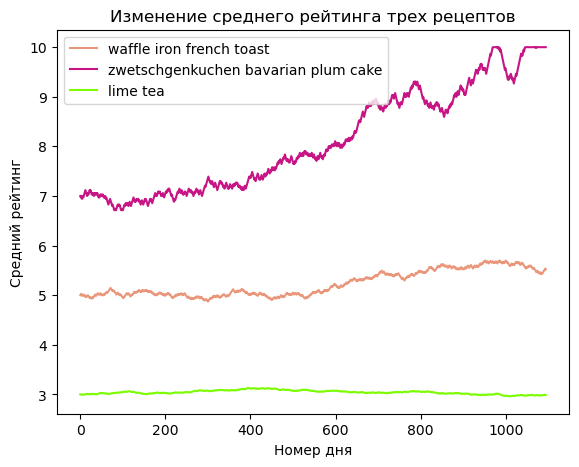

In [347]:
average_ratings=np.load('average_ratings.npy')
recipes_name={0: "waffle iron french toast", 1: 'zwetschgenkuchen bavarian plum cake', 2: 'lime tea'}
x=[i for i in range(len(a[0]))]
fig=plt.figure()
table=fig.add_axes([0.1, 0.1, 0.8, 0.8])
recipe_0, =table.plot(x, a[0], '#E9967A', label=recipes_name[0])
recipe_1, =table.plot(x, a[1], '#C71585', label=recipes_name[1])
recipe_2, =table.plot(x, a[2], '#7CFC00', label=recipes_name[2])

table.set_title('Изменение среднего рейтинга трех рецептов')
table.set_xlabel('Номер дня')
table.set_ylabel('Средний рейтинг')
table.legend(handles=[recipe_0, recipe_1, recipe_2], loc='upper left')
average_ratings

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


array([[ 5.        ,  5.01310274,  5.02623981, ...,  5.52281922,
         5.53729203,  5.52281922],
       [ 7.        ,  6.97074954,  7.        , ..., 10.        ,
        10.        , 10.        ],
       [ 3.        ,  2.9968611 ,  2.99372548, ...,  2.99372548,
         2.99059315,  2.98746409]])

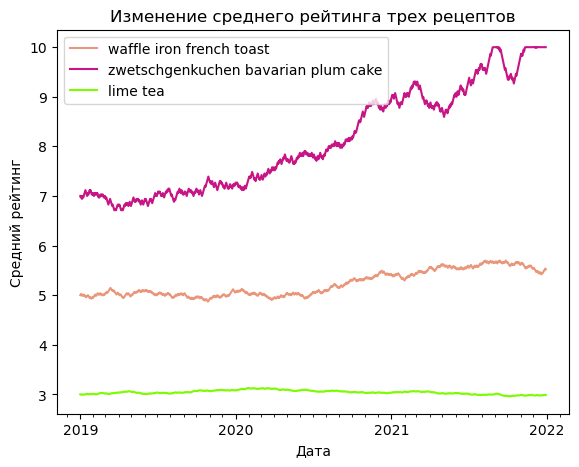

In [348]:
average_ratings=np.load('average_ratings.npy')
recipes_name={0: "waffle iron french toast", 1: 'zwetschgenkuchen bavarian plum cake', 2: 'lime tea'}
x=list(pd.date_range('2019-01-01', '2021-12-30'))
fig=plt.figure()
table=fig.add_axes([0.1, 0.1, 0.8, 0.8])
recipe_0, =table.plot(x, a[0], '#E9967A', label=recipes_name[0])
recipe_1, =table.plot(x, a[1], '#C71585', label=recipes_name[1])
recipe_2, =table.plot(x, a[2], '#7CFC00', label=recipes_name[2])

table.set_title('Изменение среднего рейтинга трех рецептов')
table.set_xlabel('Дата')
table.set_ylabel('Средний рейтинг')
table.legend(handles=[recipe_0, recipe_1, recipe_2], loc='upper left')
table.xaxis.set_minor_locator(mdates.MonthLocator())
table.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1)))
table.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
average_ratings

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

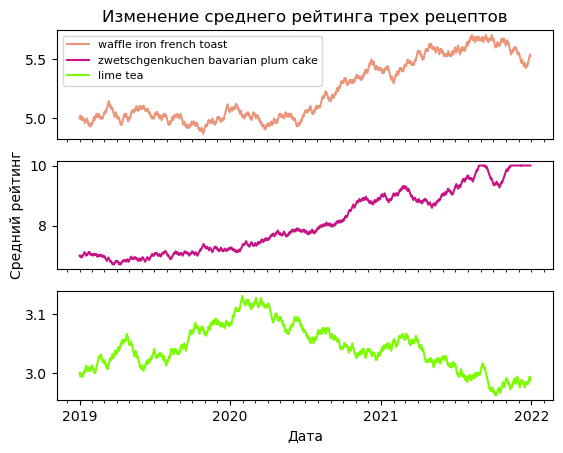

In [349]:
average_ratings=np.load('average_ratings.npy')
recipes_name={0: "waffle iron french toast", 1: 'zwetschgenkuchen bavarian plum cake', 2: 'lime tea'}
x=list(pd.date_range('2019-01-01', '2021-12-30'))
fig, axs = plt.subplots(3, 1)
# fig = plt.subplots_adjust(hspace=0.7)
axs[0].plot(a[0], '#E9967A', label=recipes_name[0])
axs[0].set_xticks([])
axs[1].plot(a[1], '#C71585', label=recipes_name[1])
axs[1].set_xticks([])
axs[2].plot(x, a[2], '#7CFC00', label=recipes_name[2])
axs[0].set_title('Изменение среднего рейтинга трех рецептов')

axs[2].set_xlabel('Дата')
axs[1].set_ylabel('Средний рейтинг')
axs[0].legend(handles=[recipe_0, recipe_1, recipe_2], loc='upper left', prop={'size': 8})
for ax in axs:
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
axs[2].xaxis.set_major_locator(mdates.YearLocator())

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


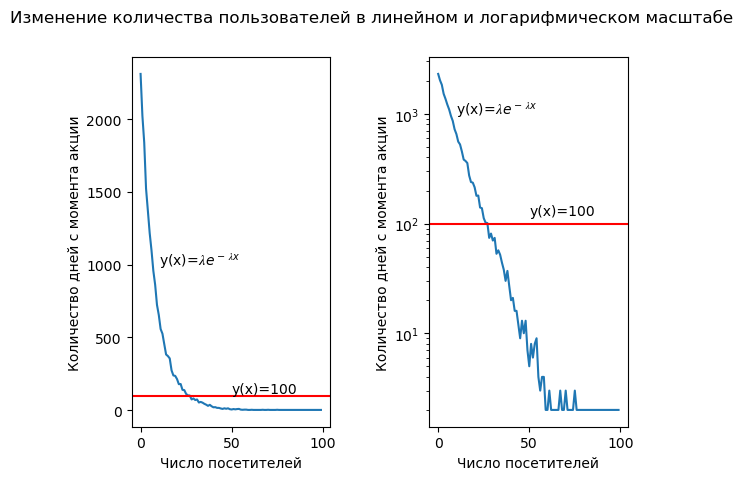

In [350]:
visitors=np.load('visitors.npy')
fig, axs = plt.subplots(1, 2)
fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')
fig = plt.subplots_adjust(wspace=0.5)
for ax in axs:
    ax.plot(visitors)
    ax.set_xlabel('Число посетителей')
    ax.set_ylabel('Количество дней с момента акции')
    ax.axhline(y = 100, color = 'r', linestyle = '-')
    ax.text(50, 120, 'y(x)=100')
    ax.text(10, 1000, f'y(x)=$𝜆e^-$'+'$^𝜆$'+'$^x$')
    
ax.set_yscale('log')

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [351]:
recipes = pd.read_csv('recipes_sample.csv')
reviews = pd.read_csv('reviews_sample.csv', parse_dates=['date'], index_col=0)
recipes_1=recipes[recipes['minutes']<5]
recipes_2=recipes[recipes['minutes']>=5]
recipes_2=recipes_2[recipes_2['minutes']<50]
recipes_3=recipes[recipes['minutes']>=50]
mean1=recipes_1['n_steps'].mean()
mean2=recipes_2['n_steps'].mean()
mean3=recipes_3['n_steps'].mean()
mean_list=[mean1, mean2, mean3]
len_list=[len(recipes_1), len(recipes_2), len(recipes_3)]
mean1, mean2, mean3

(4.990430622009569, 8.581921927361652, 11.917290164603456)

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

Text(0.5, 1.0, 'Размеры групп рецептов')

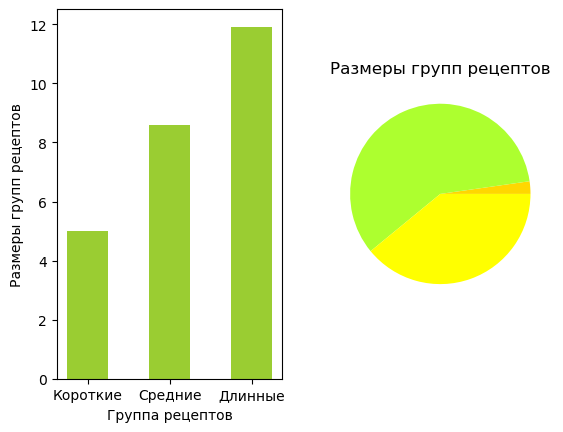

In [352]:
fig, axs = plt.subplots(1, 2)
axs[0].bar(['Короткие', 'Средние', 'Длинные'], mean_list, width=0.5, color='#9ACD32')
axs[0].set_xlabel('Группа рецептов')
axs[0].set_ylabel('Размеры групп рецептов')
axs[1].pie(len_list, colors=['#FFD700', '#ADFF2F', '#FFFF00'])
axs[1].set_title('Размеры групп рецептов')

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

(array([  656.,   148.,   199.,   594.,  2742., 13333.]),
 array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
        4.16666667, 5.        ]),
 <BarContainer object of 6 artists>)

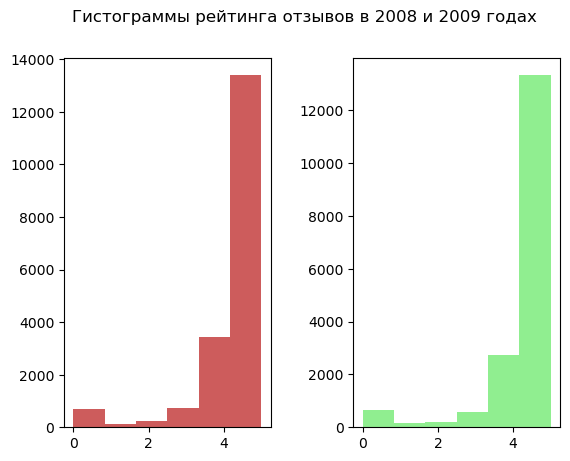

In [353]:
import datetime as dt
reviews['year']=reviews['date'].dt.year
fig, axs = plt.subplots(1, 2)
fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')
fig = plt.subplots_adjust(wspace=0.4)
reviews_8 = reviews[reviews['date'].dt.year==2008]
reviews_9 = reviews[reviews['date'].dt.year==2009]
axs[0].hist(list(reviews_8['rating']), bins=6, facecolor='#CD5C5C')
axs[1].hist(list(reviews_9['rating']), bins=6, facecolor='#90EE90')

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

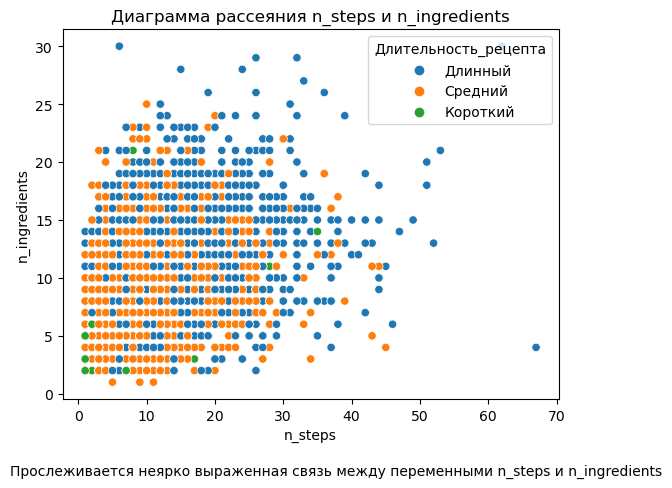

In [361]:
import seaborn as sns
recipes['Длительность_рецепта']=['Короткий' if i<5 else 'Средний' if 5<=i<50 else 'Длинный' for i in list(recipes['minutes'])]
sns.scatterplot(recipes, x='n_steps', y='n_ingredients', hue='Длительность_рецепта')
plt.title('Диаграмма рассеяния n_steps и n_ingredients')
plt.text(-10, -7, 'Прослеживается неярко выраженная связь между переменными n_steps и n_ingredients')
plt.show()

In [363]:
recipes

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,Длительность_рецепта
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,Длинный
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN,Средний
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0,Средний
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN,Средний
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN,Средний
...,...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0,Длинный
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0,Длинный
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN,Длинный
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN,Длинный


8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

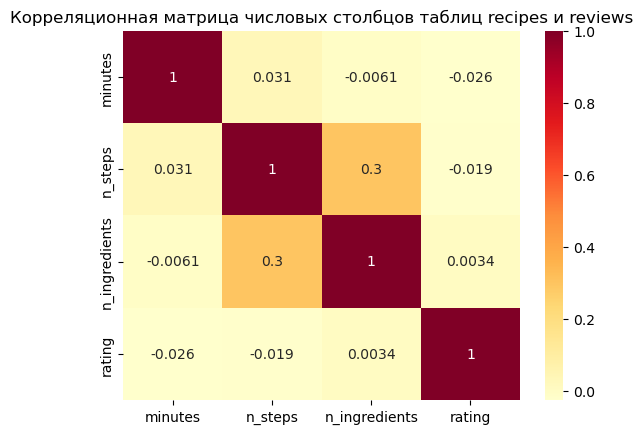

In [381]:
recipes=recipes.rename(columns={'id':'recipe_id'})
reciviews=pd.merge(recipes, reviews, how="outer", on="recipe_id")
reciviews.drop(['name', 'recipe_id', 'contributor_id', 'submitted', 'description', 'Длительность_рецепта', 'user_id', 'date', 'review', 'year'], axis=1, inplace=True)
reciviews=reciviews.corr()
sns.heatmap(reciviews, annot=True, cmap='YlOrRd')
plt.title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')
plt.show()